## Exploratory Data Analysis  
  
탐색적 데이터 분석을 실습해봅시다. with Yield of Rice per 10ha in Korea  
※해당 데이터는 [통계청](https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01&outLink=Y&entrType=#content-group) 과 [기상청](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36) 자료를 기반으로 편집했습니다.
1. 분석의 목적과 변수 확인  
2. 데이터 전체적으로 살펴보기  
3. 데이터의 개별 속성 파악하기  

In [2]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
## 데이터 불러오기

rice_df = pd.read_csv("./Yield of Rice per 10ha in Korea.csv")

### 1. 분석의 목적과 변수 확인
- 연간 기후와 조곡 생산량은 어떤 상관성이 있을까?

In [4]:
## 상위 5개 데이터 확인하기

rice_df.head(5)

,행정구역,기후측정지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균최저기온(°C),평균최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),합계 일조시간(hr),일조율(%),10a당 조곡 생산량(kg)
0,강원도,춘천,1982,11.0,-17.8,35.5,5.6,17.8,927.6,67.6,72.3,2343.7,52.85,555
1,강원도,춘천,1983,11.1,-17.0,35.5,5.9,17.1,1153.7,108.1,73.4,2306.1,51.81,533
2,강원도,춘천,1984,10.5,-23.2,35.0,5.1,16.7,1342.2,260.0,71.1,2401.6,53.84,584
3,강원도,춘천,1985,10.8,-22.6,36.0,5.8,16.6,1191.5,82.0,70.2,2166.6,48.67,587
4,강원도,춘천,1986,10.3,-25.6,34.3,5.1,16.4,1021.6,71.0,69.8,2297.3,51.61,576


In [5]:
## 각 Column의 데이터 타입 확인하기

rice_df.dtypes

행정구역                object
기후측정지점명             object
일시                   int64
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
평균최저기온(°C)         float64
평균최고기온(°C)         float64
합계 강수량(mm)         float64
일 최다 강수량(mm)       float64
평균 상대습도(%)         float64
합계 일조시간(hr)        float64
일조율(%)             float64
10a당 조곡 생산량(kg)      int64
dtype: object

### 2. 데이터 전체적으로 살펴보기

In [6]:
rice_df.describe()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균최저기온(°C),평균최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),합계 일조시간(hr),일조율(%),10a당 조곡 생산량(kg)
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2001.000000,12.214423,-15.238141,35.179487,6.930128,18.310897,1236.869231,127.349038,70.797756,2249.455769,50.716827,651.881410
std,11.272708,1.016243,3.856158,1.592394,1.293835,1.093452,318.295314,53.290535,5.066144,251.581115,5.470317,54.156633
min,1982.000000,10.200000,-26.000000,30.300000,3.300000,16.200000,505.100000,33.700000,59.600000,1632.600000,38.930000,418.000000
25%,1991.000000,11.400000,-17.600000,34.200000,6.000000,17.500000,1012.850000,88.500000,67.050000,2078.000000,46.757500,615.000000
50%,2001.000000,12.100000,-15.300000,35.200000,7.000000,18.200000,1218.200000,116.750000,70.800000,2257.650000,50.750000,654.000000
75%,2011.000000,13.000000,-12.475000,36.100000,7.900000,19.000000,1429.900000,156.450000,74.300000,2385.500000,53.545000,689.000000
max,2020.000000,14.700000,-6.300000,40.400000,9.800000,21.700000,2313.300000,308.500000,86.000000,3313.800000,74.510000,772.000000


In [7]:
## 상관계수 확인

rice_df.corr()

,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균최저기온(°C),평균최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),합계 일조시간(hr),일조율(%),10a당 조곡 생산량(kg)
일시,1.000000,0.300385,0.085450,0.254235,0.211643,0.267932,-0.004941,-0.023179,-0.318299,-0.308869,-0.325546,0.457198
평균기온(°C),0.300385,1.000000,0.696874,0.131224,0.874072,0.735418,0.031624,-0.034266,0.045280,0.029772,0.038983,0.235170
최저기온(°C),0.085450,0.696874,1.000000,-0.159100,0.669847,0.423315,-0.054524,-0.064550,0.163448,0.034924,0.060458,0.144470
최고기온(°C),0.254235,0.131224,-0.159100,1.000000,-0.113503,0.437531,-0.306641,-0.137708,-0.333399,0.200157,0.194822,0.188930
평균최저기온(°C),0.211643,0.874072,0.669847,-0.113503,1.000000,0.330778,0.221405,0.073108,0.283852,0.022783,0.021507,0.252886
평균최고기온(°C),0.267932,0.735418,0.423315,0.437531,0.330778,1.000000,-0.234421,-0.179395,-0.315120,0.019126,0.034781,0.104009
합계 강수량(mm),-0.004941,0.031624,-0.054524,-0.306641,0.221405,-0.234421,1.000000,0.603707,0.128049,-0.286347,-0.304139,-0.290353
일 최다 강수량(mm),-0.023179,-0.034266,-0.064550,-0.137708,0.073108,-0.179395,0.603707,1.000000,0.012011,-0.131556,-0.131692,-0.166952
평균 상대습도(%),-0.318299,0.045280,0.163448,-0.333399,0.283852,-0.315120,0.128049,0.012011,1.000000,0.180242,0.135661,0.005192
합계 일조시간(hr),-0.308869,0.029772,0.034924,0.200157,0.022783,0.019126,-0.286347,-0.131556,0.180242,1.000000,0.964338,0.084718


In [8]:
## 결측치 확인

rice_df.isnull()

,행정구역,기후측정지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균최저기온(°C),평균최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),합계 일조시간(hr),일조율(%),10a당 조곡 생산량(kg)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,False,False,False,False
310,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
rice_df.isnull().sum()

행정구역               0
기후측정지점명            0
일시                 0
평균기온(°C)           0
최저기온(°C)           0
최고기온(°C)           0
평균최저기온(°C)         0
평균최고기온(°C)         0
합계 강수량(mm)         0
일 최다 강수량(mm)       0
평균 상대습도(%)         0
합계 일조시간(hr)        0
일조율(%)             0
10a당 조곡 생산량(kg)    0
dtype: int64

### 3. 데이터의 개별 속성 파악하기

#### 1. 행정구역, 기후측정지점명

In [10]:
region_df = rice_df['행정구역'] + rice_df['기후측정지점명']
region_df.value_counts()

## 행정구역에 기후측정지점이 몇 종류 있는지 확인한 결과,
## 해당 자료는 행정구역별로 기후측정지점이 하나 있도록 선가공이 되었다.

경기도이천     39
경상남도밀양    39
전라북도부안    39
전라남도해남    39
충청남도서산    39
경상북도의성    39
강원도춘천     39
충청북도충주    39
dtype: int64

#### 2. 일시

In [11]:
rice_df['일시'].value_counts()

## 일시(실제로는 년도)는 각각 행정구역 팔도에 맞춰 있는 것으로 보아
## 해당 자료는 한 일시(년도)에 팔도의 데이터가 한 세트씩 있도록 선가공이 되었다.

1982    8
2011    8
2004    8
2005    8
2006    8
2007    8
2008    8
2009    8
2010    8
2012    8
2002    8
2013    8
2014    8
2015    8
2016    8
2017    8
2018    8
2019    8
2003    8
2001    8
1983    8
1991    8
1984    8
1985    8
1986    8
1987    8
1988    8
1989    8
1990    8
1992    8
2000    8
1993    8
1994    8
1995    8
1996    8
1997    8
1998    8
1999    8
2020    8
Name: 일시, dtype: int64

#### 3-1. 10a당 조곡 생산량(kg) - 지역별

In [12]:
region_pdf = rice_df[['행정구역', '10a당 조곡 생산량(kg)']].groupby(['행정구역']).mean()
region_pdf

,10a당 조곡 생산량(kg)
행정구역,
강원도,617.769231
경기도,624.538462
경상남도,623.512821
경상북도,657.205128
전라남도,639.871795
전라북도,698.974359
충청남도,697.487179
충청북도,655.692308


In [13]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

C:\Users\user\anaconda3\envs\GreppSchool\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [14]:
print(mpl.get_cachedir())

C:\Users\user\.matplotlib


In [17]:
mpl.rcParams['font.family'] = 'MaruBuri-Regular'
mpl.rcParams['font.size'] = 12

<AxesSubplot:xlabel='행정구역'>

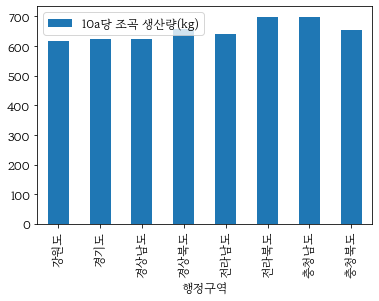

In [18]:
region_pdf.plot.bar()

## 행정구역 팔도 중 전라북도, 충청남도의 면적당 생산량이 유독 높은데
## 나머지 전라도/경상도의 생산량이 높지 않은 것으로 보아
## 한국 내 위도 차이가 상관성이 있다기보다는
## 현 통계로는 알 수 없는 지리적 특징 등과의 상관성이 있을 것이다.

#### 3-2. 10a당 조곡 생산량(kg) - 연도별

In [20]:
year_pdf = rice_df[['일시', '10a당 조곡 생산량(kg)']].groupby(['일시']).mean()
year_pdf.head(5)

,10a당 조곡 생산량(kg)
일시,
1982,612.375
1983,614.875
1984,643.250
1985,632.125
1986,632.375


<AxesSubplot:xlabel='일시'>

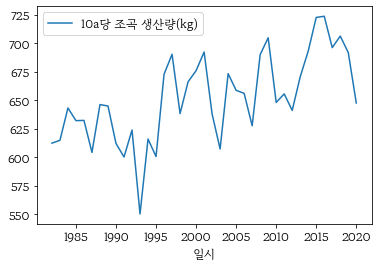

In [23]:
year_pdf.plot.line()

## 자료가 다소 부족하지만 일시(연도)에 따라 어느정도 주기를 그리면서 우상향한다.
## 위 상관계수를 참고하면 일정 일시마다 주기적으로 변화하는 기후도 어느 정도 상관이 있을 수도 있지만
## 근본적인 우상향의 원인은 통계 외적으로 일시가 지나면서 변하는 것,
## 예를 들어 농업 기술 발전 등이 있을 수 있다.

#### 3-3. 10a당 조곡 생산량(kg) - 기온별

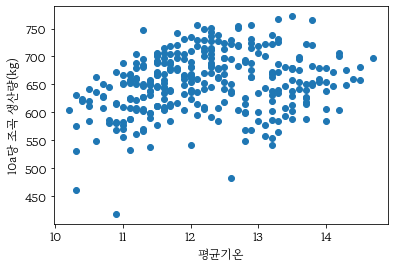

In [25]:
## 평균 기온 기준
plt.scatter(rice_df['평균기온(°C)'], rice_df['10a당 조곡 생산량(kg)'])
plt.xlabel("평균기온")
plt.ylabel("10a당 조곡 생산량(kg)")

plt.show()

## 평균 기온 12~13도 사이에 높은 조곡 생산량 데이터가 많이 분포하고 있지만
## 상관성이 크다고 하기는 어렵다.

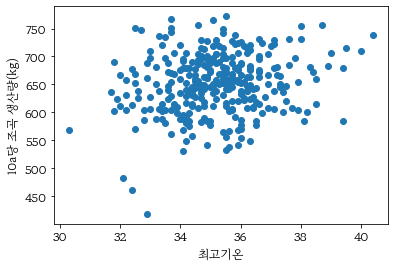

In [27]:
## 최고 기온 기준
plt.scatter(rice_df['최고기온(°C)'], rice_df['10a당 조곡 생산량(kg)'])
plt.xlabel("최고기온")
plt.ylabel("10a당 조곡 생산량(kg)")

plt.show()

## 특정 온도(34~36)에만 최고 기온 데이터가 몰려 있어
## 상관성이 낮은 것은 물론이고 데이터로서의 가치가 낮다고 판단된다.

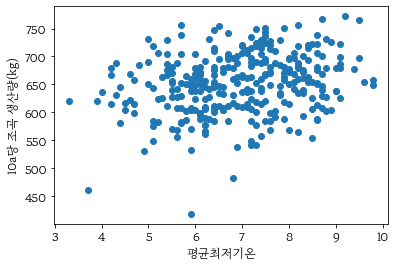

In [29]:
## 평균 최저 기온 기준
plt.scatter(rice_df['평균최저기온(°C)'], rice_df['10a당 조곡 생산량(kg)'])
plt.xlabel("평균최저기온")
plt.ylabel("10a당 조곡 생산량(kg)")

plt.show()

## 위 최고 기온의 그래프가 데이터로서의 가치가 낮다고 판단되듯이
## 최저 기온, 평균 최고 기온을 무시하고 상관 관계 표에서 높은 상관성을 보여준
## 평균 최저 기온을 확인했으나 이 역시 위와 비슷한 문제를 지니고 있다.

#### 3-3. 10a당 조곡 생산량(kg) - 강수량별

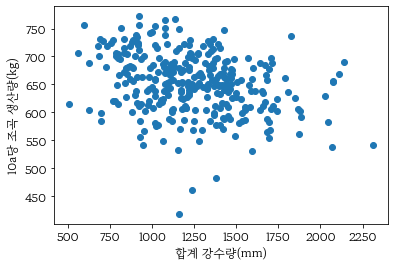

In [30]:
## 합계 강수량 기준
plt.scatter(rice_df['합계 강수량(mm)'], rice_df['10a당 조곡 생산량(kg)'])
plt.xlabel("합계 강수량(mm)")
plt.ylabel("10a당 조곡 생산량(kg)")

plt.show()

## 강수량별 데이터 분포가 일정하지 않아서 판단하기 어렵지만
## 미세하게 반비례 상관성을 보인다고 본다.

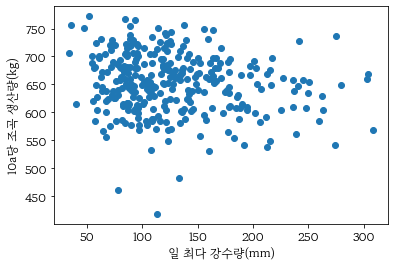

In [31]:
## 일 최다 강수량 기준
plt.scatter(rice_df['일 최다 강수량(mm)'], rice_df['10a당 조곡 생산량(kg)'])
plt.xlabel("일 최다 강수량(mm)")
plt.ylabel("10a당 조곡 생산량(kg)")

plt.show()

## 합계 강수량 기준과 달리 데이터 분포도 편향되어 있고 상관성을 찾기 어렵다.

#### 4. 일시 기준 강수량 vs 기온

In [32]:
year_pdf = rice_df[['일시', '10a당 조곡 생산량(kg)', '평균기온(°C)', '합계 강수량(mm)']].groupby(['일시']).mean()
year_pdf.head(5)

,10a당 조곡 생산량(kg),평균기온(°C),합계 강수량(mm)
일시,,,
1982,612.375,12.0250,903.4875
1983,614.875,12.0000,1140.9250
1984,643.250,11.3875,1264.8500
1985,632.125,11.7500,1494.5875
1986,632.375,11.1375,1155.2500


In [34]:
## 값들의 원활한 비교를 위해 조곡 생산량과 평균기온에 상수를 곱해준다.

year_pdf['10a당 조곡 생산량(kg)'] = year_pdf['10a당 조곡 생산량(kg)'] * 2
year_pdf['평균기온(°C)'] = year_pdf['평균기온(°C)'] * 100
year_pdf.head(5)

,10a당 조곡 생산량(kg),평균기온(°C),합계 강수량(mm)
일시,,,
1982,1224.75,1202.50,903.4875
1983,1229.75,1200.00,1140.9250
1984,1286.50,1138.75,1264.8500
1985,1264.25,1175.00,1494.5875
1986,1264.75,1113.75,1155.2500


<AxesSubplot:xlabel='일시'>

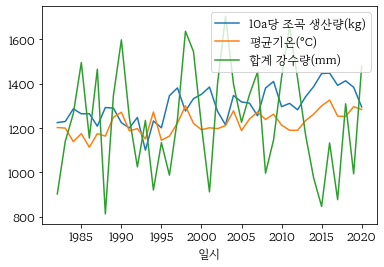

In [36]:
year_pdf.plot.line()

## 해당 그래프로 보아 합계 강수량은 연도와는 상관성이 적고
## 기온, 조곡 생산량과도 상관성이 있다고 하기 어렵다고 판단된다.

In [39]:
## 나머지 일시/기온/조곡 생산량 간의 상관성을 파악하기 위해
## 합계 강수량을 뺀 그래프를 출력하겠다.

year_pdf = rice_df[['일시', '10a당 조곡 생산량(kg)', '평균기온(°C)']].groupby(['일시']).mean()
year_pdf['평균기온(°C)'] = year_pdf['평균기온(°C)'] * 50
year_pdf.head(5)

,10a당 조곡 생산량(kg),평균기온(°C)
일시,,
1982,612.375,601.250
1983,614.875,600.000
1984,643.250,569.375
1985,632.125,587.500
1986,632.375,556.875


<AxesSubplot:xlabel='일시'>

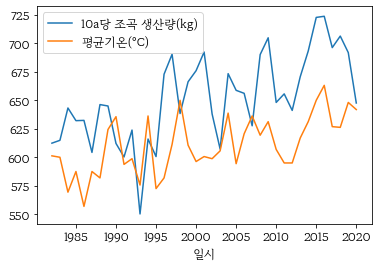

In [40]:
year_pdf.plot.line()

## 우선 큰 흐름상 일시, 평균기온, 조곡 생산량 모두 비례적인 상관성을 보인다.
## 그러나 평균기온과 조곡 생산량을 보면 단순 비례적 상관성이 있다고 하기는 어렵고
## 주기 기준으로 보면 역으로 반비례적 상관성이 있다고 할 수 있다.
## 각각 조곡 생산량의 경우 일시가 지나면서 농업 기술의 발달에 의한 생산량 증가,
## 평균 기온의 경우 일시가 지나면서 심해지는 지구 온난화가 더 인과적인 관계이고
## 두 값의 비례적 상관성은 일시와의 상관 관계인 요소들에 의한 것일 뿐,
## 실제로는 서로 반비례적인 상관성을 지닐 수 있다고 본다.

### 결론  
  
1. 조곡 생산량은 기후보다는 각 지역의 지리적 특성에 더 큰 상관성을 지닌다.
2. 조곡 생산량은 일시에 높은 상관성을 지닌다.
3. 조곡 생산량은 평균기온과 크게는 비례적 상관성을 지니지만 주기 형태를 보면 반비례적 상관성을 지닌다.